### This code snippet demonstrates the usage of Pandas, Matplotlib, and Seaborn libraries for data analysis and visualization.

Required Packages:
- pandas: a powerful data manipulation and analysis library
- matplotlib: a plotting library for creating static, animated, and interactive visualizations
- seaborn: a data visualization library built on top of Matplotlib, providing high-level interface for drawing attractive and informative statistical graphics

Usage:
1. Import the necessary libraries: pandas, matplotlib, and seaborn.
2. Load the data into a Pandas DataFrame using pd.read_csv(), pd.read_excel(), or any other applicable method.
3. Perform data analysis and manipulation using Pandas functions and methods.
4. Create visualizations using Matplotlib and Seaborn functions.
5. Customize the plots as needed using the available options and parameters.
6. Display the plots using plt.show().

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The data from the "Login_Data.csv" file is read and stored in a pandas DataFrame object named 'df'.

The pd.read_csv() function is called with the file path ./Login_Data.csv as an argument. The function reads the CSV file and converts it into a pandas DataFrame. The resulting DataFrame is then assigned to the variable df.

The purpose of this code is to load the data from the CSV file into a DataFrame for further data manipulation, analysis, or processing using pandas.

In [36]:
df = pd.read_csv("./Login_Data.csv")

The head() method is commonly used in data analysis and exploratory data analysis (EDA) tasks to obtain an overview of the data before performing further analysis or processing. It is particularly useful when dealing with large datasets, as it provides a concise summary of the DataFrame content.

In [38]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful
0,43:30.8,-4.320000e+18,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False
1,43:43.5,-4.320000e+18,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False
2,43:55.9,-3.280000e+18,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,True
3,43:56.2,-4.320000e+18,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False
4,43:59.4,-4.620000e+18,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,False


### This code snippet provides a visual representation of the top 10 users with the highest number of login attempts. It helps in identifying the most active users based on login activity.

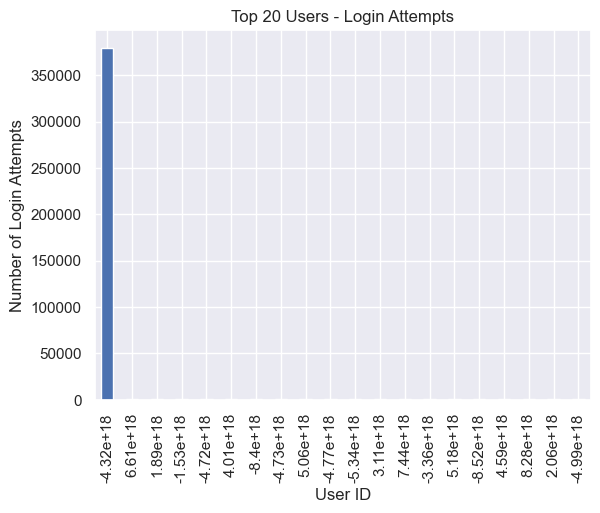

In [42]:
login_attempts = df['User ID'].value_counts()
top_10_users = login_attempts.head(20)
sns.set(style='darkgrid')
top_10_users.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Number of Login Attempts')
plt.title('Top 20 Users - Login Attempts')
plt.show()


### In this code, 2 new column named 'NumSuccessfulLogins' and 'NumUnuccessfulLogins' are added to the DataFrame df. The values in this column represent the total number of successful logins and total number of unsuccessful logins for each user respectivly.

In [45]:
df['NumSuccessfulLogins'] = df.groupby('User ID')['Login Successful'].transform('sum')

In [47]:
# Grouping the data by "User ID" and counting the number of False values in "Login Successful"
false_counts = df[df['Login Successful'] == False].groupby('User ID').size().reset_index(name='NumUnsuccessfulLogins')

# Merging the false_counts DataFrame with the original data
df = df.merge(false_counts, on='User ID', how='left')

# Imputating NaN values in the new column with 0
df['NumUnsuccessfulLogins'] = df['NumUnsuccessfulLogins'].fillna(0)

# Converting the values in the "False Count" column to integers
df['NumUnsuccessfulLogins'] = df['NumUnsuccessfulLogins'].astype(int)

In [49]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins
0,43:30.8,-4.320000e+18,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False,277,379201
1,43:43.5,-4.320000e+18,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False,277,379201
2,43:55.9,-3.280000e+18,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,True,246,77
3,43:56.2,-4.320000e+18,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,277,379201
4,43:59.4,-4.620000e+18,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,False,249,108


### This code snippet filters and extracts data for a specific User ID, creates a bar graph to represent the login statistics, annotates the bars with their values, and displays the graph for analysis. It uses the extracted values of successful and unsuccessful logins as the data for the graph.

In [59]:
# Find the User ID with the most unsuccessful logins
most_unsuccessful_user = df.loc[df['NumUnsuccessfulLogins'].idxmax(), 'User ID']
print(f"User ID with the most unsuccessful logins: {most_unsuccessful_user}")


User ID with the most unsuccessful logins: -4.32e+18


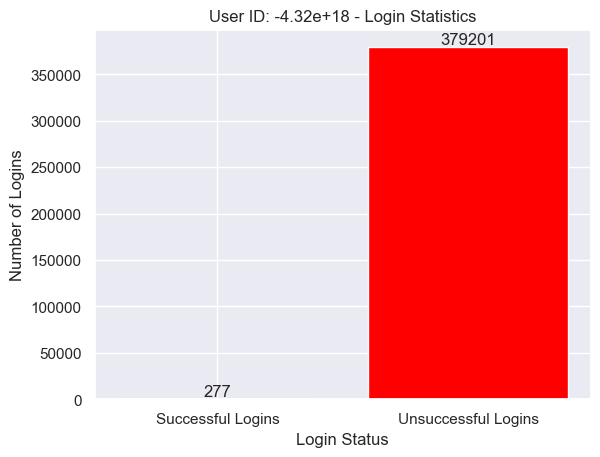

In [61]:
if most_unsuccessful_user in df['User ID'].values:
    user_data = df[df['User ID'] == most_unsuccessful_user]

    # Get the first row for the User ID
    row_data = user_data.iloc[0]

    # Retrieve NumSuccessfulLogins and NumUnsuccessfulLogins
    num_successful_logins = row_data['NumSuccessfulLogins']
    num_unsuccessful_logins = row_data['NumUnsuccessfulLogins']

    # Plot the data
    labels = ['Successful Logins', 'Unsuccessful Logins']
    values = [num_successful_logins, num_unsuccessful_logins]

    plt.bar(labels, values, color=['blue', 'red'])
    plt.xlabel('Login Status')
    plt.ylabel('Number of Logins')
    plt.title(f'User ID: {most_unsuccessful_user} - Login Statistics')

    # Add values on top of bars
    for i, v in enumerate(values):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.show()
else:
    print(f"No data available for User ID: {most_unsuccessful_user}")


### This code snippet aims to identify the user with the highest frequency of occurrences in the dataset. It calculates the most occurring user ID by counting the occurrences of each unique user ID and selecting the index (user ID) with the maximum count. The code then filters the dataset to include only the rows corresponding to this most occurring user. This allows for further analysis and examination of the specific login patterns and characteristics associated with this particular user.

In [63]:
most_occuring_user = df['User ID'].value_counts().idxmax()

# Filtering the dataset to include only the rows for the most occurring user
df = df[df['User ID'] == most_occuring_user]

# Print the dataset
df

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins
0,43:30.8,-4.320000e+18,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False,277,379201
1,43:43.5,-4.320000e+18,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False,277,379201
3,43:56.2,-4.320000e+18,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,277,379201
5,44:05.2,-4.320000e+18,209.236.123.126,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,277,379201
13,44:26.8,-4.320000e+18,46.212.51.170,NO,Viken,Klofta,Chrome 86.0.4240.378,desktop,False,277,379201
...,...,...,...,...,...,...,...,...,...,...,...
1048560,39:44.5,-4.320000e+18,201.94.205.18,BR,Parana,Londrina,Chrome Mobile 81.0.4044.1934,mobile,False,277,379201
1048565,39:48.7,-4.320000e+18,185.87.165.42,GB,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,277,379201
1048567,39:49.0,-4.320000e+18,131.0.236.155,MX,-,-,Chrome Mobile WebView 87.0.4280,mobile,False,277,379201
1048569,39:49.4,-4.320000e+18,182.237.15.14,IN,Gujarat,Gandhinagar,Firefox 20.0.0.1618,mobile,False,277,379201


### This code snippet uses the Python `re` module to extract the browser category from the "Browser Name and Version" column in the dataframe. 

### It applies a lambda function to each value in the column, using a regular expression pattern (`r'^\D+'`) to match and extract the non-digit characters at the beginning of each string. If a match is found, the extracted category is assigned to the corresponding row in the "Browser Category" column; otherwise, an empty string is assigned. This step allows for categorizing the browsers based on their names and versions, providing a simplified representation for further analysis.

In [66]:
import re
df['Browser Category'] = df['Browser Name and Version'].apply(lambda x: re.search(r'^\D+', x).group() if re.search(r'^\D+', x) else '')
# df = df.drop(['Browser Name and Version'], axis=1)

In [68]:
df

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins,Browser Category
0,43:30.8,-4.320000e+18,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False,277,379201,Firefox
1,43:43.5,-4.320000e+18,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False,277,379201,Chrome Mobile
3,43:56.2,-4.320000e+18,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,277,379201,Chrome Mobile WebView
5,44:05.2,-4.320000e+18,209.236.123.126,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,277,379201,Chrome Mobile WebView
13,44:26.8,-4.320000e+18,46.212.51.170,NO,Viken,Klofta,Chrome 86.0.4240.378,desktop,False,277,379201,Chrome
...,...,...,...,...,...,...,...,...,...,...,...,...
1048560,39:44.5,-4.320000e+18,201.94.205.18,BR,Parana,Londrina,Chrome Mobile 81.0.4044.1934,mobile,False,277,379201,Chrome Mobile
1048565,39:48.7,-4.320000e+18,185.87.165.42,GB,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,277,379201,Chrome Mobile WebView
1048567,39:49.0,-4.320000e+18,131.0.236.155,MX,-,-,Chrome Mobile WebView 87.0.4280,mobile,False,277,379201,Chrome Mobile WebView
1048569,39:49.4,-4.320000e+18,182.237.15.14,IN,Gujarat,Gandhinagar,Firefox 20.0.0.1618,mobile,False,277,379201,Firefox


### This code snippet calculates the counts of each browser category present in the "Browser Category" column of the dataframe and selects the top 10 categories. 

### It then creates a pie chart using the `plt.pie()` function, where each category is represented as a slice of the pie. The `labels` parameter assigns the category names to the corresponding slices, and the `autopct` parameter formats the percentage values displayed on the chart. The `plt.axis('equal')` line ensures that the pie is drawn as a circle. Finally, the chart is displayed with the `plt.show()` function.

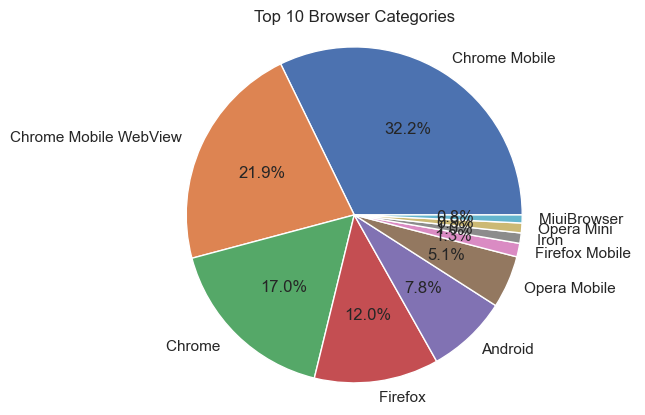

In [71]:
# Getting the counts of each browser category
browser_category_counts = df['Browser Category'].value_counts().head(10)

# Create the pie chart
plt.pie(browser_category_counts, labels=browser_category_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 Browser Categories')

# The chart
plt.show()

### This code snippet calculates the counts of each device type present in the "Device Type" column of the dataframe. It then creates a pie chart using the `plt.pie()` function, where each device type is represented as a slice of the pie.

### The `labels` parameter assigns the device type names to the corresponding slices, and the `autopct` parameter formats the percentage values displayed on the chart. The `plt.title()` function sets the title of the chart. 

### The chart is displayed with the `plt.show()` function. The code also includes commented-out code to define custom colors for the pie chart, which can be used by uncommenting and modifying the `colors` list.

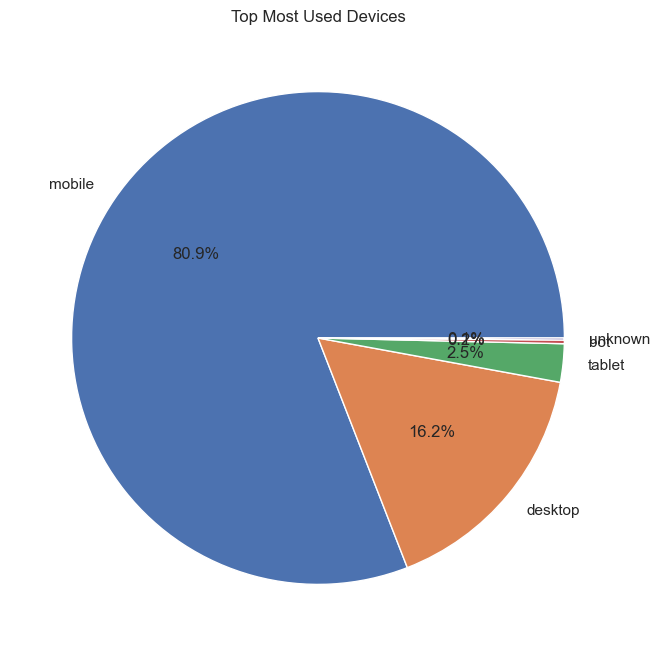

In [74]:
device_counts = df['Device Type'].value_counts()

# Define custom light colors for the pie chart
# colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']


# Plotting the pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%')
plt.title('Top Most Used Devices')
plt.show()

### The provided code calculates the total number of successful logins for each country by grouping the dataframe based on the "Country" column and summing the corresponding "NumSuccessfulLogins" values. 

### The top 10 countries with the highest login counts are then selected using the `nlargest()` function. A bar graph is created using `plt.bar()` to visualize the number of logins for each country. The x-axis represents the countries, and the y-axis represents the number of logins. 

### The x-axis labels are rotated for better readability using `plt.xticks(rotation=45)`. Finally, the graph is displayed using `plt.show()`.

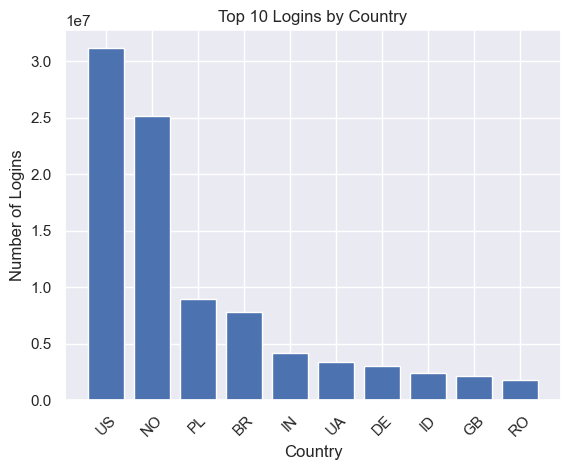

In [77]:
country_logins = df.groupby('Country')['NumSuccessfulLogins'].sum()

# Select the top 10 countries with the highest login counts
top_10_countries = country_logins.nlargest(10)

# Create the bar graph
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Logins')
plt.title('Top 10 Logins by Country')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the graph
plt.show()


### This code performs several operations on the dataframe. 
### First, it converts the 'Login Timestamp' column to a datetime format using the `pd.to_datetime()` function. 
### Then, it sorts the data in ascending order based

In [82]:
print(df['Login Timestamp'].head(10))  # View the first 10 rows
print(df['Login Timestamp'].unique())  # View all unique timestamp values


0     43:30.8
1     43:43.5
3     43:56.2
5     44:05.2
13    44:26.8
14    44:29.2
17    44:33.0
18    44:33.1
23    44:40.4
24    44:40.5
Name: Login Timestamp, dtype: object
['43:30.8' '43:43.5' '43:56.2' ... '38:09.1' '13:59.2' '23:10.2']


In [84]:
df = df.dropna(subset=['Login Timestamp'])

In [92]:
# Step 1: Convert the 'Login Timestamp' column to datetime format
df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'], errors='coerce')

# Step 2: Check for any rows where conversion failed
if df['Login Timestamp'].isna().any():
    print("Warning: Some timestamps could not be converted and will be dropped.")
    df = df.dropna(subset=['Login Timestamp'])

# Step 3: Sort the data by 'User ID' and 'Login Timestamp'
df.sort_values(['User ID', 'Login Timestamp'], inplace=True)

# Step 4: Calculate the time difference until the next attempt for each user
df['Time Difference'] = df.groupby('User ID')['Login Timestamp'].diff()

# Step 5: Replace NaT values with 0 for users with only one attempt
df['Time Difference'] = df['Time Difference'].fillna(pd.Timedelta(seconds=0))

# Display the resulting DataFrame
print(df.head())




C:\Users\ashis\AppData\Local\Temp\ipykernel_18040\1574178314.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'], errors='coerce')


       Login Timestamp       User ID      IP Address Country Region City  \
30836       2024-12-12 -4.320000e+18   81.166.176.69      BR      -    -   
48027       2024-12-12 -4.320000e+18  103.79.141.106      VN      -    -   
157211      2024-12-12 -4.320000e+18  23.137.225.196      US      -    -   
222456      2024-12-12 -4.320000e+18    170.39.77.64      US      -    -   
278712      2024-12-12 -4.320000e+18     10.3.87.165      PL      -    -   

               Browser Name and Version Device Type  Login Successful  \
30836      Chrome Mobile 81.0.4044.1943      mobile             False   
48027                  Chrome 88.0.4323     desktop             False   
157211  Chrome Mobile WebView 81.0.4044      mobile             False   
222456          Chrome Mobile 84.0.4147      mobile             False   
278712          Chrome Mobile 81.0.4044      mobile             False   

        NumSuccessfulLogins  NumUnsuccessfulLogins        Browser Category  \
30836                   27

C:\Users\ashis\AppData\Local\Temp\ipykernel_18040\1574178314.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(['User ID', 'Login Timestamp'], inplace=True)
C:\Users\ashis\AppData\Local\Temp\ipykernel_18040\1574178314.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Difference'] = df.groupby('User ID')['Login Timestamp'].diff()
C:\Users\ashis\AppData\Local\Temp\ipykernel_18040\1574178314.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [94]:
df

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins,Browser Category,Time Difference
30836,2024-12-12 00:00:00,-4.320000e+18,81.166.176.69,BR,-,-,Chrome Mobile 81.0.4044.1943,mobile,False,277,379201,Chrome Mobile,0 days
48027,2024-12-12 00:00:00,-4.320000e+18,103.79.141.106,VN,-,-,Chrome 88.0.4323,desktop,False,277,379201,Chrome,0 days
157211,2024-12-12 00:00:00,-4.320000e+18,23.137.225.196,US,-,-,Chrome Mobile WebView 81.0.4044,mobile,False,277,379201,Chrome Mobile WebView,0 days
222456,2024-12-12 00:00:00,-4.320000e+18,170.39.77.64,US,-,-,Chrome Mobile 84.0.4147,mobile,False,277,379201,Chrome Mobile,0 days
278712,2024-12-12 00:00:00,-4.320000e+18,10.3.87.165,PL,-,-,Chrome Mobile 81.0.4044,mobile,False,277,379201,Chrome Mobile,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532900,2024-12-12 23:59:54,-4.320000e+18,109.247.136.166,NO,Rogaland,Kvernaland,Chrome 73.0.3654,desktop,False,277,379201,Chrome,0 days
698746,2024-12-12 23:59:54,-4.320000e+18,23.137.225.193,US,-,-,Chrome Mobile 81.0.4044.2208,mobile,False,277,379201,Chrome Mobile,0 days
757347,2024-12-12 23:59:54,-4.320000e+18,89.238.115.35,DE,-,-,Firefox 20.0.0.1618,mobile,False,277,379201,Firefox,0 days
761910,2024-12-12 23:59:54,-4.320000e+18,10.3.133.160,UA,-,-,Chrome Mobile 81.0.4044,mobile,False,277,379201,Chrome Mobile,0 days


### The line `df['Time Difference'] = pd.to_timedelta(df['Time Difference']).dt.total_seconds()` converts the 'Time Difference' column in the dataframe from a timedelta format to the total number of seconds. 

### By applying the `pd.to_timedelta()` function, the values in the column are converted to timedelta objects representing the duration between login attempts. Then, the `.dt.total_seconds()` method is used to calculate the total duration in seconds for each timedelta value, and the resulting values are assigned back to the 'Time Difference' column in the dataframe.

In [97]:
df['Time Difference'] = pd.to_timedelta(df['Time Difference']).dt.total_seconds()

C:\Users\ashis\AppData\Local\Temp\ipykernel_18040\1397300988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Difference'] = pd.to_timedelta(df['Time Difference']).dt.total_seconds()


In [99]:
df.tail()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins,Browser Category,Time Difference
532900,2024-12-12 23:59:54,-4.320000e+18,109.247.136.166,NO,Rogaland,Kvernaland,Chrome 73.0.3654,desktop,False,277,379201,Chrome,0.0
698746,2024-12-12 23:59:54,-4.320000e+18,23.137.225.193,US,-,-,Chrome Mobile 81.0.4044.2208,mobile,False,277,379201,Chrome Mobile,0.0
757347,2024-12-12 23:59:54,-4.320000e+18,89.238.115.35,DE,-,-,Firefox 20.0.0.1618,mobile,False,277,379201,Firefox,0.0
761910,2024-12-12 23:59:54,-4.320000e+18,10.3.133.160,UA,-,-,Chrome Mobile 81.0.4044,mobile,False,277,379201,Chrome Mobile,0.0
979752,2024-12-12 23:59:54,-4.320000e+18,23.137.224.41,US,-,-,Iron 66.0.3450.1151,mobile,False,277,379201,Iron,0.0


### The line df['Time Difference'] = pd.to_timedelta(df['Time Difference'], unit='s') converts the values in the 'Time Difference' column from seconds (previously calculated as total seconds) to a timedelta format using the pd.to_timedelta() function. The unit='s' argument specifies that the values should be interpreted as seconds.

### The next line, df_sorted = df[df['Time Difference'] > pd.Timedelta(0)].sort_values('Time Difference').head(20), creates a new dataframe df_sorted by filtering the original dataframe df to include only the rows where the 'Time Difference' is greater than 0 seconds, indicating valid time differences between login attempts. Then, the filtered dataframe is sorted in ascending order based on the 'Time Difference' column, and only the first 20 rows are selected using the head(20) method.

### The resulting df_sorted dataframe contains the top 20 rows with the smallest time differences between login attempts, ensuring that the time difference is greater than 0 seconds.

In [106]:
# Ensure 'Time Difference' is of type Timedelta
df['Time Difference'] = pd.to_timedelta(df['Time Difference'], errors='coerce')

# Now perform the filtering
df_sorted = df[df['Time Difference'] > pd.Timedelta(0)].sort_values('Time Difference').head(20)

# Display the result
print(df_sorted)


           Login Timestamp       User ID      IP Address Country  \
123121 2024-12-12 00:00:06 -4.320000e+18        10.3.4.6      ID   
31970  2024-12-12 15:59:18 -4.320000e+18    199.26.84.25      US   
67000  2024-12-12 15:59:24 -4.320000e+18  92.220.115.108      NO   
71199  2024-12-12 15:59:30 -4.320000e+18   23.137.224.11      US   
80479  2024-12-12 15:59:36 -4.320000e+18   131.255.44.28      BR   
12843  2024-12-12 15:59:42 -4.320000e+18    170.39.78.24      US   
58664  2024-12-12 15:59:48 -4.320000e+18    199.26.84.40      US   
232546 2024-12-12 15:59:54 -4.320000e+18   193.178.144.8      UA   
55131  2024-12-12 16:00:00 -4.320000e+18   170.39.77.143      US   
50065  2024-12-12 16:00:06 -4.320000e+18  209.236.125.27      US   
202807 2024-12-12 16:00:12 -4.320000e+18    10.0.181.227      BD   
17912  2024-12-12 16:00:18 -4.320000e+18  79.160.199.178      NO   
133128 2024-12-12 15:59:12 -4.320000e+18   212.8.251.222      AU   
50066  2024-12-12 16:00:24 -4.320000e+18    10.0

C:\Users\ashis\AppData\Local\Temp\ipykernel_18040\2252649748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Difference'] = pd.to_timedelta(df['Time Difference'], errors='coerce')


In [108]:
df_sorted


,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins,Browser Category,Time Difference
123121,2024-12-12 00:00:06,-4.320000e+18,10.3.4.6,ID,-,-,Chrome Mobile WebView 80.0.3987,mobile,False,277,379201,Chrome Mobile WebView,0 days 00:00:00.000000006
31970,2024-12-12 15:59:18,-4.320000e+18,199.26.84.25,US,-,-,Chrome Mobile WebView 81.0.4044,mobile,False,277,379201,Chrome Mobile WebView,0 days 00:00:00.000000006
67000,2024-12-12 15:59:24,-4.320000e+18,92.220.115.108,NO,Viken,Lommedalen,Android 2.3.3.2672,mobile,False,277,379201,Android,0 days 00:00:00.000000006
71199,2024-12-12 15:59:30,-4.320000e+18,23.137.224.11,US,-,-,Chrome Mobile 48.0.2564,mobile,False,277,379201,Chrome Mobile,0 days 00:00:00.000000006
80479,2024-12-12 15:59:36,-4.320000e+18,131.255.44.28,BR,Rio Grande do Sul,Torres,Chrome 72.0.3626.55,desktop,False,277,379201,Chrome,0 days 00:00:00.000000006
12843,2024-12-12 15:59:42,-4.320000e+18,170.39.78.24,US,-,-,Chrome Mobile 81.0.4044.1949,mobile,False,277,379201,Chrome Mobile,0 days 00:00:00.000000006
58664,2024-12-12 15:59:48,-4.320000e+18,199.26.84.40,US,-,-,Firefox 20.0.0.1850,mobile,False,277,379201,Firefox,0 days 00:00:00.000000006
232546,2024-12-12 15:59:54,-4.320000e+18,193.178.144.8,UA,-,-,Firefox 20.0.0.1618,mobile,False,277,379201,Firefox,0 days 00:00:00.000000006
55131,2024-12-12 16:00:00,-4.320000e+18,170.39.77.143,US,-,-,Chrome Mobile 50.0.2661,mobile,False,277,379201,Chrome Mobile,0 days 00:00:00.000000006
50065,2024-12-12 16:00:06,-4.320000e+18,209.236.125.27,US,-,-,Chrome Mobile 80.0.3987,mobile,False,277,379201,Chrome Mobile,0 days 00:00:00.000000006
